In [ ]:
### To Read CSV file from Google Drive :

from google.colab import auth
import gspread
from google.auth import default
import pandas as pd


In [ ]:
## To train and test 
from sklearn.model_selection import train_test_split

In [ ]:
## To scale 
from sklearn.preprocessing import MinMaxScaler

In [ ]:
## To create a neural network model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
### Authenticate User:

auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:
### Open the Google Sheet and convert into DataFrame :

worksheet = gc.open('sheet_for_DL').sheet1
rows = worksheet.get_all_values()
df = pd.DataFrame(rows[1:], columns = rows[0])



In [ ]:
df = df.astype({'Input':'float'})
df = df.astype({'Output':'float'})

In [ ]:
df

,Input,Output
0,1.0,5.0
1,2.0,10.0
2,3.0,15.0
3,4.0,20.0
4,5.0,25.0
5,6.0,30.0
6,7.0,35.0
7,8.0,40.0
8,9.0,45.0
9,10.0,50.0


In [ ]:
X = df[['Input']].values
y = df[['Output']].values

In [ ]:
X

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.]])

In [ ]:
y

array([[ 5.],
       [10.],
       [15.],
       [20.],
       [25.],
       [30.],
       [35.],
       [40.],
       [45.],
       [50.]])

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size = 0.4, random_state =35)

In [ ]:
Scaler = MinMaxScaler()

In [ ]:
Scaler.fit(X_train)

MinMaxScaler()

In [ ]:
X_train1 = Scaler.transform(X_train)

In [ ]:
ai = Sequential([Dense(5 , activation = 'relu') ,Dense(10,activation = 'relu'), Dense(1)])

In [ ]:
ai.compile(optimizer = 'rmsprop' , loss = 'mse')

In [ ]:
ai.fit(X_train1 , y_train,epochs = 1900)

Epoch 1/1900
1/1 [==============================] - 1s 601ms/step - loss: 1140.9484
Epoch 2/1900
1/1 [==============================] - 0s 16ms/step - loss: 1139.7371
Epoch 3/1900
1/1 [==============================] - 0s 10ms/step - loss: 1138.8398
Epoch 4/1900
1/1 [==============================] - 0s 9ms/step - loss: 1138.0800
Epoch 5/1900
1/1 [==============================] - 0s 9ms/step - loss: 1137.3987
Epoch 6/1900
1/1 [==============================] - 0s 11ms/step - loss: 1136.7689
Epoch 7/1900
1/1 [==============================] - 0s 9ms/step - loss: 1136.1754
Epoch 8/1900
1/1 [==============================] - 0s 9ms/step - loss: 1135.6086
Epoch 9/1900
1/1 [==============================] - 0s 11ms/step - loss: 1135.0624
Epoch 10/1900
1/1 [==============================] - 0s 10ms/step - loss: 1134.5343
Epoch 11/1900
1/1 [==============================] - 0s 10ms/step - loss: 1134.0186
Epoch 12/1900
1/1 [==============================] - 0s 9ms/step - loss: 1133.5127
Epoch

In [ ]:
loss_df = pd.DataFrame(ai.history.history)

<AxesSubplot:>

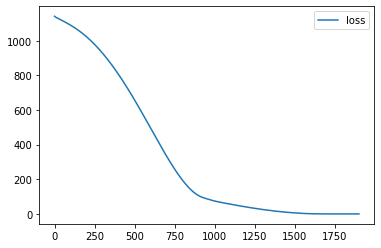

In [ ]:
loss_df.plot()

In [ ]:
X_test1 =Scaler.transform(X_test)

In [ ]:
ai.evaluate(X_test1,y_test)

1/1 [==============================] - 0s 153ms/step - loss: 0.0013


0.001324759447015822

In [ ]:
X_n1=[[4]]

In [ ]:
X_n1_1=Scaler.transform(X_n1)

In [ ]:
ai.predict(X_n1_1)

1/1 [==============================] - 0s 92ms/step


array([[19.969048]], dtype=float32)